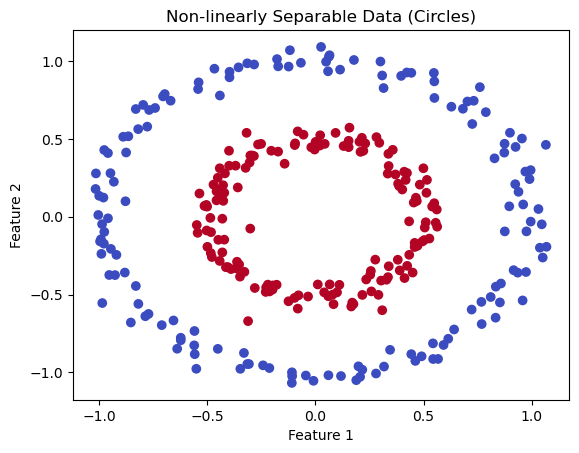

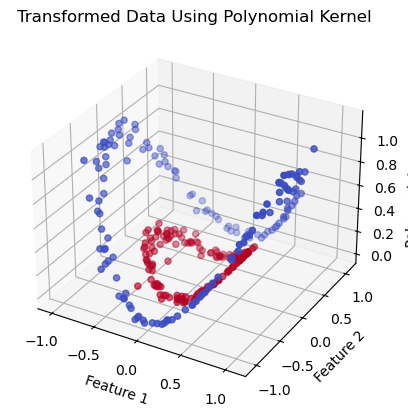

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        51

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



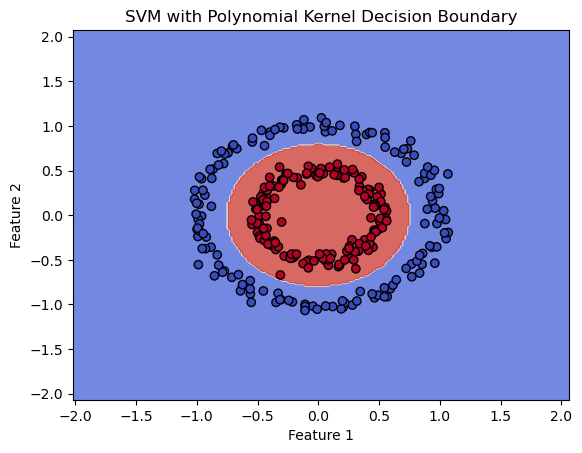

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

def create_dataset():
    """
    Create a non-linearly separable dataset with interleaving circles.
    
    Returns:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
    """
    X, y = make_circles(n_samples=300, factor=.5, noise=.05)
    return X, y

def plot_original_data(X, y):
    """
    Plot the original non-linearly separable dataset.
    
    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
    """
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title('Non-linearly Separable Data (Circles)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def transform_data(X):
    """
    Transform the data using a polynomial feature map.
    
    Args:
        X (np.ndarray): Original feature matrix.
    
    Returns:
        X_poly (np.ndarray): Transformed feature matrix.
    """
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    return X_poly

def plot_transformed_data(X_poly, y):
    """
    Plot the transformed data in 3D.
    
    Args:
        X_poly (np.ndarray): Transformed feature matrix.
        y (np.ndarray): Target vector.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_poly[:, 1], X_poly[:, 2], X_poly[:, 3], c=y, cmap=plt.cm.coolwarm)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Polynomial Feature')
    plt.title('Transformed Data Using Polynomial Kernel')
    plt.show()

def train_svm(X_train, y_train):
    """
    Train an SVM classifier with a polynomial kernel.
    
    Args:
        X_train (np.ndarray): Training feature matrix.
        y_train (np.ndarray): Training target vector.
    
    Returns:
        clf (SVC): Trained SVM classifier.
    """
    clf = SVC(kernel='poly', degree=2, C=1.0)
    clf.fit(X_train, y_train)
    return clf

def evaluate_model(clf, X_test, y_test):
    """
    Evaluate the SVM classifier and print accuracy and classification report.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X_test (np.ndarray): Test feature matrix.
        y_test (np.ndarray): Test target vector.
    """
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(clf, X, y):
    """
    Plot the decision boundary of the SVM classifier in the original 2D space.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
    """
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM with Polynomial Kernel Decision Boundary')
    plt.show()

def main():
    # Step 1: Create and plot the original dataset
    X, y = create_dataset()
    plot_original_data(X, y)

    # Step 2: Transform the data and plot it in 3D
    X_poly = transform_data(X)
    plot_transformed_data(X_poly, y)

    # Step 3: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Step 4: Train the SVM classifier
    clf = train_svm(X_train, y_train)

    # Step 5: Evaluate the SVM classifier
    evaluate_model(clf, X_test, y_test)

    # Step 6: Plot the decision boundary in the original 2D space
    plot_decision_boundary(clf, X, y)

if __name__ == "__main__":
    main()


### Example

Consider a simple 2D case with vector$ \( \mathbf{x}_i = [x_{i1}, x_{i2} $\) an$ \( \mathbf{x}_j = [x_{j1}, x_{j2} $\). Fo$ \( d =  $\) an$ \( \gamma =  $\)$ \( r =  $\):

$$
K(\mathbf{x}_i, \mathbf{x}_j) = (x_{i1} x_{j1} + x_{i2} x_{j2})^2
$$

Expanding this, we get:

$$
K(\mathbf{x}_i, \mathbf{x}_j) = x_{i1}^2 x_{j1}^2 + 2 x_{i1} x_{j1} x_{i2} x_{j2} + x_{i2}^2 x_{j2}^2
$$

This includes linear terms, quadratic terms, and interaction terms, enabling the model to capture more complex patterns.
lex patterns.


   Sepal length  Sepal width  Target
0           5.1          3.5       0
1           4.9          3.0       0
2           4.7          3.2       0
3           4.6          3.1       0
4           5.0          3.6       0


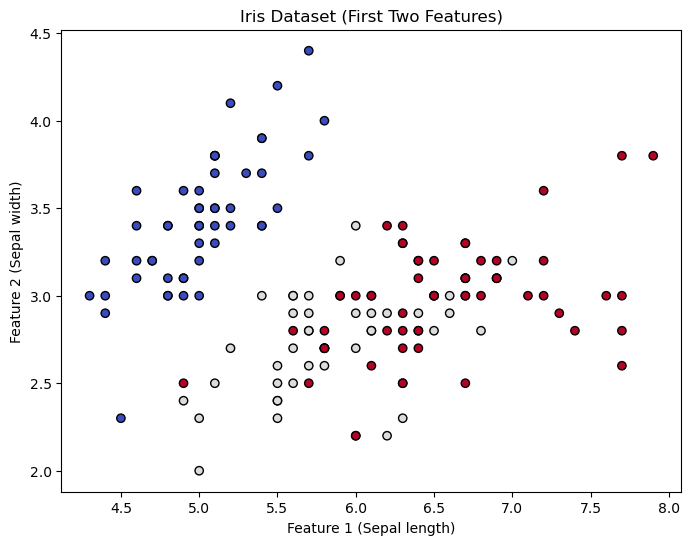

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.62      0.77      0.69        13
           2       0.80      0.67      0.73        18

    accuracy                           0.80        45
   macro avg       0.81      0.81      0.81        45
weighted avg       0.81      0.80      0.80        45



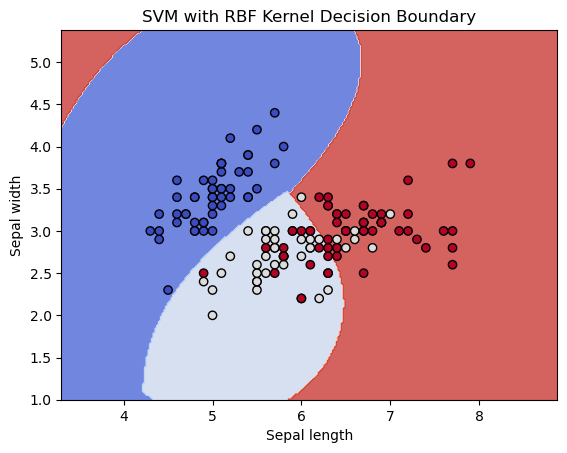

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

def load_dataset():
    """
    Load the Iris dataset and select the first two features for visualization.
    
    Returns:
        X (np.ndarray): Feature matrix with the first two features.
        y (np.ndarray): Target vector.
    """
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # We only take the first two features for visualization purposes
    y = iris.target
    return X, y

def plot_dataset(X, y):
    """
    Plot the dataset to visualize the distribution of the data points and their respective classes.
    
    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title('Iris Dataset (First Two Features)')
    plt.xlabel('Feature 1 (Sepal length)')
    plt.ylabel('Feature 2 (Sepal width)')
    plt.show()

def display_dataset_as_dataframe(X, y):
    """
    Display the dataset as a pandas DataFrame.
    
    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
    
    Returns:
        df (pd.DataFrame): Dataset as a DataFrame.
    """
    df = pd.DataFrame(X, columns=['Sepal length', 'Sepal width'])
    df['Target'] = y
    print(df.head())  # Display the first few rows of the DataFrame
    return df

def split_dataset(X, y, test_size=0.3, random_state=49):
    """
    Split the dataset into training and testing sets.
    
    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Seed used by the random number generator.
    
    Returns:
        X_train, X_test, y_train, y_test: Split dataset.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def create_and_train_svm(X_train, y_train, kernel='rbf', gamma=0.7, C=1.0):
    """
    Create and train an SVM classifier.
    
    Args:
        X_train (np.ndarray): Training feature matrix.
        y_train (np.ndarray): Training target vector.
        kernel (str): Specifies the kernel type to be used in the algorithm.
        gamma (float): Kernel coefficient.
        C (float): Regularization parameter.
    
    Returns:
        clf (SVC): Trained SVM classifier.
    """
    clf = svm.SVC(kernel=kernel, gamma=gamma, C=C)
    clf.fit(X_train, y_train)
    return clf

def evaluate_model(clf, X_test, y_test):
    """
    Evaluate the SVM classifier and print accuracy and classification report.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X_test (np.ndarray): Test feature matrix.
        y_test (np.ndarray): Test target vector.
    """
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(clf, X, y, h=0.02):
    """
    Plot the decision boundary of the SVM classifier in the original 2D space.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
        h (float): Step size in the mesh.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('SVM with RBF Kernel Decision Boundary')
    plt.show()

def main():
    # Step 1: Load the dataset
    X, y = load_dataset()
    
    # Step 2: Display the dataset as a DataFrame
    df = display_dataset_as_dataframe(X, y)
    
    # Step 3: Plot the dataset to visualize it
    plot_dataset(X, y)
    
    # Step 4: Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = split_dataset(X, y)
    
    # Step 5: Create and train the SVM classifier
    clf = create_and_train_svm(X_train, y_train)
    
    # Step 6: Evaluate the SVM classifier
    evaluate_model(clf, X_test, y_test)
    
    # Step 7: Plot the decision boundary
    plot_decision_boundary(clf, X, y)

if __name__ == "__main__":
    main()


   Sepal length  Sepal width  Target
0           5.1          3.5       0
1           4.9          3.0       0
2           4.7          3.2       0
3           4.6          3.1       0
4           5.0          3.6       0


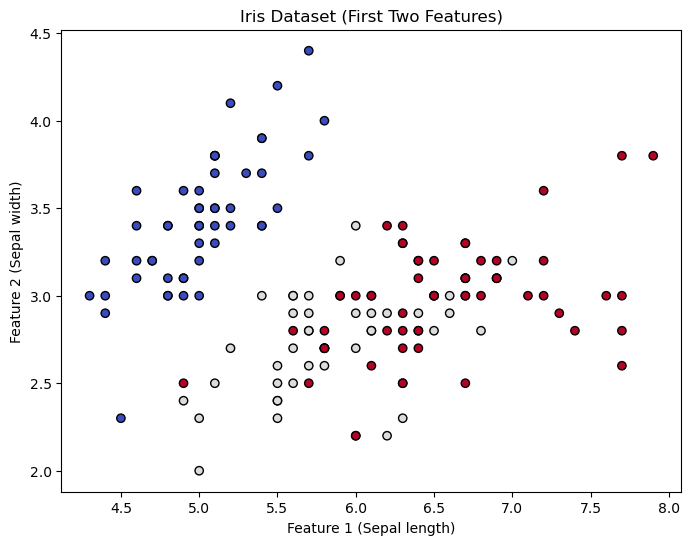

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.62      0.77      0.69        13
           2       0.80      0.67      0.73        18

    accuracy                           0.80        45
   macro avg       0.81      0.81      0.81        45
weighted avg       0.81      0.80      0.80        45



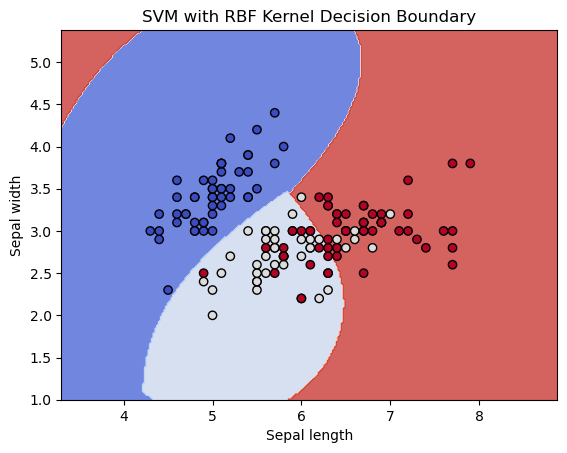

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

def load_dataset():
    """
    Load the Iris dataset and select the first two features for visualization.
    
    Returns:
        X (np.ndarray): Feature matrix with the first two features.
        y (np.ndarray): Target vector.
    """
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # We only take the first two features for visualization purposes
    y = iris.target
    return X, y

def plot_dataset(X, y):
    """
    Plot the dataset to visualize the distribution of the data points and their respective classes.
    
    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title('Iris Dataset (First Two Features)')
    plt.xlabel('Feature 1 (Sepal length)')
    plt.ylabel('Feature 2 (Sepal width)')
    plt.show()

def display_dataset_as_dataframe(X, y):
    """
    Display the dataset as a pandas DataFrame.
    
    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
    
    Returns:
        df (pd.DataFrame): Dataset as a DataFrame.
    """
    df = pd.DataFrame(X, columns=['Sepal length', 'Sepal width'])
    df['Target'] = y
    print(df.head())  # Display the first few rows of the DataFrame
    return df

def split_dataset(X, y, test_size=0.3, random_state=49):
    """
    Split the dataset into training and testing sets.
    
    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Seed used by the random number generator.
    
    Returns:
        X_train, X_test, y_train, y_test: Split dataset.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def create_and_train_svm(X_train, y_train, kernel='rbf', gamma=0.7, C=1.0):
    """
    Create and train an SVM classifier.
    
    Args:
        X_train (np.ndarray): Training feature matrix.
        y_train (np.ndarray): Training target vector.
        kernel (str): Specifies the kernel type to be used in the algorithm.
        gamma (float): Kernel coefficient.
        C (float): Regularization parameter.
    
    Returns:
        clf (SVC): Trained SVM classifier.
    """
    clf = svm.SVC(kernel=kernel, gamma=gamma, C=C)
    clf.fit(X_train, y_train)
    return clf

def evaluate_model(clf, X_test, y_test):
    """
    Evaluate the SVM classifier and print accuracy and classification report.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X_test (np.ndarray): Test feature matrix.
        y_test (np.ndarray): Test target vector.
    """
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(clf, X, y, h=0.02):
    """
    Plot the decision boundary of the SVM classifier in the original 2D space.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
        h (float): Step size in the mesh.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('SVM with RBF Kernel Decision Boundary')
    plt.show()

def main():
    # Step 1: Load the dataset
    X, y = load_dataset()
    
    # Step 2: Display the dataset as a DataFrame
    df = display_dataset_as_dataframe(X, y)
    
    # Step 3: Plot the dataset to visualize it
    plot_dataset(X, y)
    
    # Step 4: Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = split_dataset(X, y)
    
    # Step 5: Create and train the SVM classifier
    clf = create_and_train_svm(X_train, y_train)
    
    # Step 6: Evaluate the SVM classifier
    evaluate_model(clf, X_test, y_test)
    
    # Step 7: Plot the decision boundary
    plot_decision_boundary(clf, X, y)

if __name__ == "__main__":
    main()
